In [5]:
#Using KMeans Clustering

import numpy as np
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Step 1: Collect data on network speeds/bandwidths of all users
# Array of network speeds/bandwidths

print('Enter the Bandwidths')
arr=list(map(int,input().split()))
arr.sort()
speeds=np.array(arr)

# Step 2: Initialize number of clusters

min_transfers = int(input('Enter Minimum Transfers: '))  # Minimum number of transfers sender can handle
max_transfers = int(input('Enter Maximum Transfers: '))  # Maximum number of transfers sender can handle (Based on Cloud Service Provider's RAM Specs)
k = min(max(len(speeds) // max_transfers, 1), len(speeds) // min_transfers)  # Compute number of clusters
print('K Value is: ',k)

# Steps 3-4: Normalize and cluster data

X = (speeds - np.mean(speeds)) / np.std(speeds)  # Normalize data
'''print('\n\nNormalized Cluster:')
print(X)
print('X Reshapes:\n',X.reshape(-1, 1))'''

kmeans = KMeans(n_clusters=k).fit(X.reshape(-1, 1))  # Apply KMeans clustering

# Step 5: Assign users to nearest cluster

labels = kmeans.predict(X.reshape(-1, 1))  # Assign labels to each data point

#Sorting the Labels
labels=np.sort(labels)

#Printing the Clusters and the Bandwidths

print('\nThe Clusters (Using KMeans Clustering)!\n')
for i in range(len(arr)):
    print(f"{arr[i]}\t\tGroup: {labels[i]}")

# Step 6: Calculate average network speed/bandwidth for each cluster

cluster_speeds = np.zeros(k)
for i in range(k):
    cluster_speeds[i] = np.mean(X[labels == i] * np.std(speeds) + np.mean(speeds))
    
print('\n\n\nCluster Speeds:\n',cluster_speeds)


#Note that the total number of clusters is inversily proportional to the Maximum Transfers Allowed.
#More the transfers tolerated by the device, the lesser grouping of data will be present

Enter the Bandwidths
10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180
Enter Minimum Transfers: 1
Enter Maximum Transfers: 3
K Value is:  6

The Clusters (Using KMeans Clustering)!

10		Group: 0
20		Group: 0
30		Group: 0
40		Group: 1
50		Group: 1
60		Group: 1
70		Group: 2
80		Group: 2
90		Group: 2
100		Group: 3
110		Group: 3
120		Group: 3
130		Group: 4
140		Group: 4
150		Group: 4
160		Group: 5
170		Group: 5
180		Group: 5



Cluster Speeds:
 [ 20.  50.  80. 110. 140. 170.]


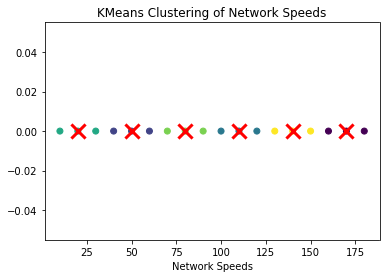

In [8]:
#Displaying the KMeans Clustering Graphically using matplotlib.pyplot

# Get cluster centers and assignments
centers = cluster_speeds
labels = kmeans.labels_
#print(labels)

# Plot data points and cluster centers
fig, ax = plt.subplots()
ax.scatter(speeds, np.zeros_like(speeds), c=labels)
ax.scatter(centers, np.zeros_like(centers), marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel('Network Speeds')
ax.set_title('KMeans Clustering of Network Speeds')

# Show plot
plt.show()